In [36]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the first hidden layer of the autoencoder
encoded1 = Dense(128, activation='relu')(input_img)
# "encoded" is the second hidden layer of the autoencoder
encoded2 = Dense(64, activation='relu')(encoded1)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(encoded2)

# "decoded" is the first hidden layer in the decoder
decoded1 = Dense(64, activation='relu')(encoded)
# "decoded" is the second hidden layer in the decoder
decoded2 = Dense(128, activation='relu')(decoded1)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(decoded2)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics ='accuracy')

# Print the summary of the autoencoder architecture
autoencoder.summary()

# Load the Fashion MNIST dataset and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder on x_train and x_train
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_52 (Dense)            (None, 128)               100480    
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 64)                2112      
                                                                 
 dense_56 (Dense)            (None, 128)               8320      
                                                                 
 dense_57 (Dense)            (None, 784)               101

In [37]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 2s 4ms/step - loss: 0.6972 - val_loss: 0.6970
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6970 - val_loss: 0.6967
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6967 - val_loss: 0.6964
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6964 - val_loss: 0.6962
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6962 - val_loss: 0.6959
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6960 - val_loss: 0.6957
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6957 - val_loss: 0.6955
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6955 - val_loss: 0.6952
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6953 - val_loss: 0.6950
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6950 - val_loss: 0.6948

313/313 [==============================] - 0s 1ms/step


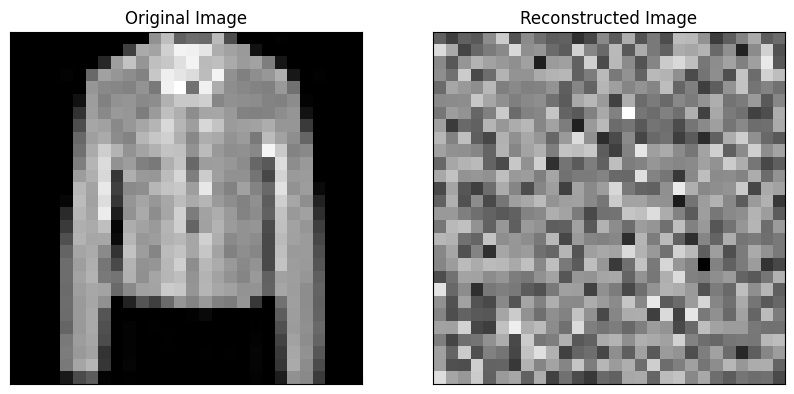

In [38]:
# Predict the test data
reconstructed_images = autoencoder.predict(x_test)

# Choose one random image index from the test data for visualization
image_index = np.random.randint(0, len(x_test))

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(denoised_images[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

In [39]:

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics ='accuracy')

# Load the Fashion MNIST dataset and preprocess the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise to the training and test data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train the denoising autoencoder on x_train_noisy and x_train
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.6961 - accuracy: 0.0011 - val_loss: 0.6960 - val_accuracy: 0.0015
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6958 - accuracy: 0.0011 - val_loss: 0.6958 - val_accuracy: 0.0015
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6955 - accuracy: 0.0011 - val_loss: 0.6955 - val_accuracy: 0.0015
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6953 - accuracy: 0.0011 - val_loss: 0.6952 - val_accuracy: 0.0015
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6950 - accuracy: 0.0011 - val_loss: 0.6950 - val_accuracy: 0.0016
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6948 - accuracy: 0.0011 - val_loss: 0.6948 - val_accuracy: 0.0016
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6945 - accuracy: 0.0011 - val_loss: 0.6945 - val_accuracy: 0.0015
Epoch 

313/313 [==============================] - 0s 1ms/step


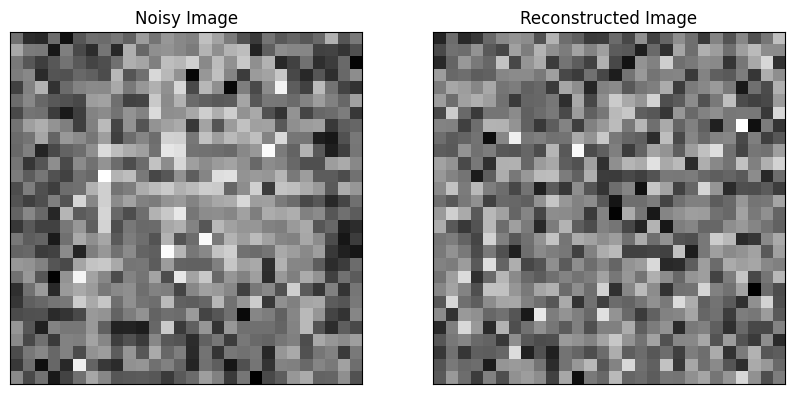

In [40]:
# Predict the test data after denoising
denoised_images = autoencoder.predict(x_test_noisy)

# Choose one random image index from the test data for visualization
image_index = np.random.randint(0, len(x_test))

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(denoised_images[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6936 - accuracy: 0.0011 - val_loss: 0.6936 - val_accuracy: 0.0014
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.0011 - val_loss: 0.6933 - val_accuracy: 0.0014
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.0011 - val_loss: 0.6931 - val_accuracy: 0.0014
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6930 - accuracy: 0.0012 - val_loss: 0.6929 - val_accuracy: 0.0014
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6928 - accuracy: 0.0012 - val_loss: 0.6927 - val_accuracy: 0.0013
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.0012 - val_loss: 0.6925 - val_accuracy: 0.0013
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6924 - accuracy: 0.0012 - val_loss: 0.6923 - val_accuracy: 0.0013
Epoch 

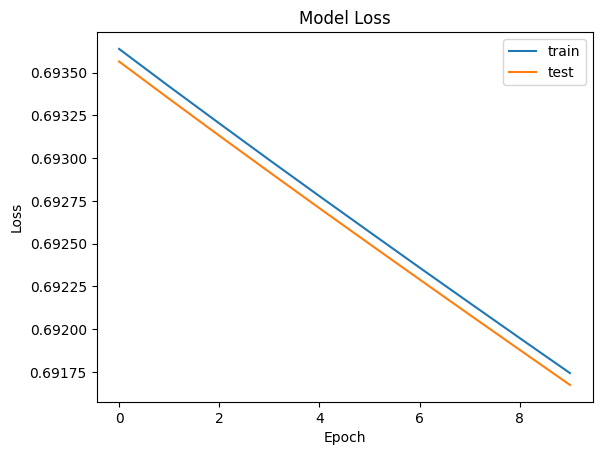

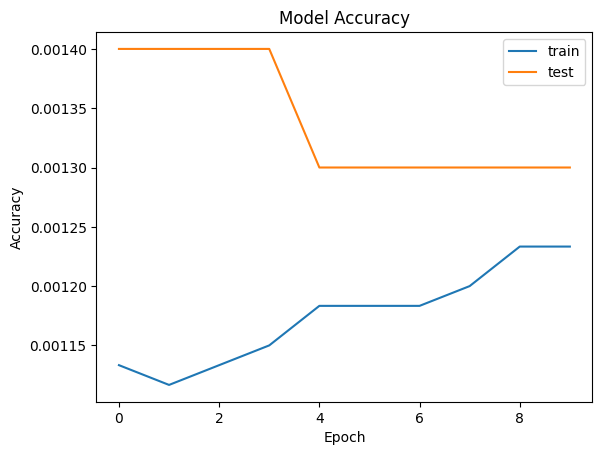

In [41]:
import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()